<a href="https://colab.research.google.com/github/Susanna-Salata/Sigma-University/blob/main/Sigma_HW_2_Susanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# --------------------------- Homework_2  ------------------------------------

Виконала: Сусанна Салата
Homework_2, варіант 4, І рівень складності:
Умови <br>
Закон зміни похибки – рівномірний;<br>
Закон зміни досліджуваного процесу (тренду) – лінійний.<br>
Реальні дані – 3 показника на вибір.<br>

Виконання:
1. Відкинути зайве, додати необхідне;
2. Написати власний скрипт.

Package                      Version
---------------------------- -----------

In [ ]:
import sys
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# ------------------------ ФУНКЦІЯ парсингу реальних даних --------------------------

def file_parsing(URL, File_name, Data_name):
    d = pd.read_excel(File_name)
    for name, values in d[[Data_name]].items():
        print(values)
    S_real = np.zeros((len(values)))
    for i in range(len(values)):
        S_real[i] = values[i]
    print('Джерело даних: ', URL)
    return S_real

# ---------------------- ФУНКЦІЇ тестової аддитивної моделі -------------------------

In [ ]:
# ----------- рівномірний закон розподілу номерів АВ в межах вибірки ----------------
def randomAM(n, iter):
    SAV = np.zeros((nAV))
    S = np.zeros((n))
    for i in range(n):
        S[i] = np.random.randint(0, iter)  # параметри закону задаются межами аргументу
    mS = np.median(S)
    dS = np.var(S)
    scvS = mt.sqrt(dS)
    # -------------- генерація номерів АВ за рівномірним законом  -------------------
    for i in range(nAV):
        SAV[i] = mt.ceil(np.random.randint(1, iter))  # рівномірний розкид номерів АВ в межах вибірки розміром 0-iter
    print('номери АВ: SAV=', SAV)
    print('----- статистичны характеристики РІВНОМІРНОГО закону розподілу ВВ -----')
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('-----------------------------------------------------------------------')
    # гістограма закону розподілу ВВ
    plt.hist(S, bins=20, facecolor="blue", alpha=0.5)
    plt.show()
    return SAV


# ------------------------- нормальний закон розводілу ВВ ----------------------------
def randoNORM(dm, dsig, iter):
    S = np.random.normal(dm, dsig,
                         iter)  # нормальний закон розподілу ВВ з вибіркою єбємом iter та параметрами: dm, dsig
    mS = np.median(S)
    dS = np.var(S)
    scvS = mt.sqrt(dS)
    print('------- статистичны характеристики НОРМАЛЬНОЇ похибки вимірів -----')
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('------------------------------------------------------------------')
    # гістограма закону розподілу ВВ
    plt.hist(S, bins=20, facecolor="blue", alpha=0.5)
    plt.show()
    return S


# ------------------- модель ідеального тренду (лінійний закон)  ------------------
def Model(n):
    S0 = np.zeros((n))
    for i in range(n):
        S0[i] = (0.05 * i  + 0.3)  # лінійна модель реального процесу
    return S0


# ---------------- модель виміру (лінійний закон) з нормальний шумом ---------------
def Model_NORM(SN, S0N, n):
    SV = np.zeros((n))
    for i in range(n):
        SV[i] = S0N[i] + SN[i]
    return SV


# ----- модель виміру (лінійний закон) з нормальний шумом + АНОМАЛЬНІ ВИМІРИ
def Model_NORM_AV(S0, SV, nAV, Q_AV):
    SV_AV = SV
    SSAV = np.random.normal(dm, (Q_AV * dsig), nAV)  # аномальна випадкова похибка з нормальним законом
    for i in range(nAV):
        k = int(SAV[i])
        SV_AV[k] = S0[k] + SSAV[i]  # аномальні вимірів з рівномірно розподіленими номерами
    return SV_AV


# ----- Коефіцієнт детермінації - оцінювання якості моделі --------
def r2_score(SL, Yout, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    iter = len(Yout)
    numerator = 0
    denominator_1 = 0
    for i in range(iter):
        numerator = numerator + (SL[i] - Yout[i, 0]) ** 2
        denominator_1 = denominator_1 + SL[i]
    denominator_2 = 0
    for i in range(iter):
        denominator_2 = denominator_2 + (SL[i] - (denominator_1 / iter)) ** 2
    R2_score_our = 1 - (numerator / denominator_2)
    print('------------', Text, '-------------')
    print('кількість елементів вбірки=', iter)
    print('Коефіцієнт детермінації (ймовірність апроксимації)=', R2_score_our)

    return R2_score_our


# ----- статистичні характеристики вхідної вибірки  --------
def Stat_characteristics_in(SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter))
    for i in range(iter):
        SL0[i] = SL[i] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    print('------------', Text, '-------------')
    print('кількість елементів вбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('-----------------------------------------------------')
    return


# ----- статистичні характеристики лінії тренда  --------
def Stat_characteristics_out(SL_in, SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter))
    for i in range(iter):
        SL0[i] = SL[i, 0] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    # глобальне лінійне відхилення оцінки - динамічна похибка моделі
    Delta = 0
    for i in range(iter):
        Delta = Delta + abs(SL_in[i] - Yout[i, 0])
    Delta_average_Out = Delta / (iter + 1)
    print('------------', Text, '-------------')
    print('кількість елементів ивбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('Динамічна похибка моделі=', Delta_average_Out)
    print('-----------------------------------------------------')
    return


# ----- статистичні характеристики екстраполяції  --------
def Stat_characteristics_extrapol(koef, SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter))
    for i in range(iter):
        SL0[i] = SL[i, 0] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    #  довірчий інтервал прогнозованих значень за СКВ
    scvS_extrapol = scvS * koef
    print('------------', Text, '-------------')
    print('кількість елементів ивбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('Довірчий інтервал прогнозованих значень за СКВ=', scvS_extrapol)
    print('-----------------------------------------------------')
    return


# ------------- МНК згладжуваннядля визначення стат. характеристик -------------
def MNK_Stat_characteristics(S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT = F.T
    FFT = FT.dot(F)
    FFTI = np.linalg.inv(FFT)
    FFTIFT = FFTI.dot(FT)
    C = FFTIFT.dot(Yin)
    Yout = F.dot(C)
    return Yout


# --------------- графіки тренда, вимірів з нормальним шумом  ---------------------------
def Plot_AV(S0_L, SV_L, Text):
    plt.clf()
    plt.plot(SV_L)
    plt.plot(S0_L)
    plt.ylabel(Text)
    plt.show()
    return


# ------------------------------ МНК згладжування -------------------------------------
def MNK(S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT = F.T
    FFT = FT.dot(F)
    FFTI = np.linalg.inv(FFT)
    FFTIFT = FFTI.dot(FT)
    C = FFTIFT.dot(Yin)
    Yout = F.dot(C)
    print('Регресійна модель:')
    print('y(t) = ', C[0, 0], ' + ', C[1, 0], ' * t', ' + ', C[2, 0], ' * t^2')
    return Yout


# ------------------------ МНК детекція та очищення АВ ------------------------------
def MNK_AV_Detect(S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT = F.T
    FFT = FT.dot(F)
    FFTI = np.linalg.inv(FFT)
    FFTIFT = FFTI.dot(FT)
    C = FFTIFT.dot(Yin)
    return C[1, 0]


# ---------------------------  МНК ПРОГНОЗУВАННЯ -------------------------------
def MNK_Extrapol(S0, koef):
    iter = len(S0)
    Yout_Extrapol = np.zeros((iter + koef, 1))
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT = F.T
    FFT = FT.dot(F)
    FFTI = np.linalg.inv(FFT)
    FFTIFT = FFTI.dot(FT)
    C = FFTIFT.dot(Yin)
    print('Регресійна модель:')
    print('y(t) = ', C[0, 0], ' + ', C[1, 0], ' * t', ' + ', C[2, 0], ' * t^2')
    for i in range(iter + koef):
        Yout_Extrapol[i, 0] = C[0, 0] + C[1, 0] * i + (C[2, 0] * i * i)  # проліноміальна крива МНК - прогнозування
    return Yout_Extrapol


# ------------------------------ Виявлення АВ за алгоритмом medium -------------------------------------
def Sliding_Window_AV_Detect_medium(S0, n_Wind, Q):
    # ---- параметри циклів ----
    iter = len(S0)
    j_Wind = mt.ceil(iter - n_Wind) + 1
    S0_Wind = np.zeros((n_Wind))
    # -------- еталон  ---------
    j = 0
    for i in range(n_Wind):
        l = (j + i)
        S0_Wind[i] = S0[l]
        dS_standart = np.var(S0_Wind)
        scvS_standart = mt.sqrt(dS_standart)
    # ---- ковзне вікно ---------
    for j in range(j_Wind):
        for i in range(n_Wind):
            l = (j + i)
            S0_Wind[i] = S0[l]
        # - Стат хар ковзного вікна --
        mS = np.median(S0_Wind)
        dS = np.var(S0_Wind)
        scvS = mt.sqrt(dS)
        # --- детекція та заміна АВ --
        if scvS > (Q * scvS_standart):
            # детектор виявлення АВ
            S0[l] = mS
    return S0


# ------------------------------ Виявлення АВ за МНК -------------------------------------
def Sliding_Window_AV_Detect_MNK(S0, Q, n_Wind):
    # ---- параметри циклів ----
    iter = len(S0)
    j_Wind = mt.ceil(iter - n_Wind) + 1
    S0_Wind = np.zeros((n_Wind))
    # -------- еталон  ---------
    Speed_standart = MNK_AV_Detect(SV_AV)
    Yout_S0 = MNK(SV_AV)
    # ---- ковзне вікно ---------
    for j in range(j_Wind):
        for i in range(n_Wind):
            l = (j + i)
            S0_Wind[i] = S0[l]
        # - Стат хар ковзного вікна --
        dS = np.var(S0_Wind)
        scvS = mt.sqrt(dS)
        # --- детекція та заміна АВ --
        Speed_standart_1 = abs(Speed_standart * mt.sqrt(iter))
        Speed_1 = abs(Q * Speed_standart * mt.sqrt(n_Wind) * scvS)
        if Speed_1 > Speed_standart_1:
            # детектор виявлення АВ
            S0[l] = Yout_S0[l, 0]
    return S0


# ------------------------------ Виявлення АВ за алгоритмом sliding window -------------------------------------
def Sliding_Window_AV_Detect_sliding_wind(S0, n_Wind):
    # ---- параметри циклів ----
    iter = len(S0)
    j_Wind = mt.ceil(iter - n_Wind) + 1
    S0_Wind = np.zeros((n_Wind))
    Midi = np.zeros((iter))
    # ---- ковзне вікно ---------
    for j in range(j_Wind):
        for i in range(n_Wind):
            l = (j + i)
            S0_Wind[i] = S0[l]
        # - Стат хар ковзного вікна --
        Midi[l] = np.median(S0_Wind)
    # ---- очищена вибірка  -----
    S0_Midi = np.zeros((iter))
    for j in range(iter):
        S0_Midi[j] = Midi[j]
    for j in range(n_Wind):
        S0_Midi[j] = S0[j]
    return S0_Midi

# -------------------------------- БЛОК ГОЛОВНИХ ВИКЛИКІВ ------------------------------

## ------------------------------ Джерело вхідних даних ---------------------------

### Модель

номери АВ: SAV= [1415. 7413. 4792. 9690. 5427. 3883. 6214.   37. 7121. 3111. 7946. 4623.
 8285. 5515. 6606. 9245. 5103. 3304. 4072. 4656. 7760. 2011. 9790.   76.
 5781. 5607. 5156. 7997. 7835. 5034. 5934. 5930. 3268. 7006. 1204. 8348.
 4829. 1430. 4697. 2427. 8833. 4945. 9446. 4740. 2754. 4135. 8982. 6732.
 8757. 8873. 5021. 9271. 2256.  357. 4239. 2105. 8331. 5736. 5224. 7372.
 6294. 7083. 7273.  697. 4910. 9520. 6939. 6584. 3541. 8499.  298. 9454.
  599. 3975. 5924. 9218. 1567. 1940. 8377.   68. 9279.  303. 7646. 9152.
 4410. 4624. 8845. 3825. 2138. 3016. 2362. 9165. 4310.  484. 2203. 7957.
 2286. 1103. 2092. 2657. 1269. 3263. 3571. 6347. 2192. 7077. 1353. 1321.
 4781. 5363. 1151. 3121. 3913. 5642.  917. 2148. 4995. 7071. 7835.  215.
 5367. 5380.  936. 5977. 7688. 2978. 4460. 1520. 9994. 4002. 1627. 5815.
 8053. 3738. 2515. 1587. 6889. 6652. 1919. 4020. 6106. 6672. 3512.  953.
   59. 6910. 1954. 9287. 5309. 6391.  732. 2662. 9721. 7146. 6364. 1118.
 7971. 6382. 9378. 3166. 8029. 2793

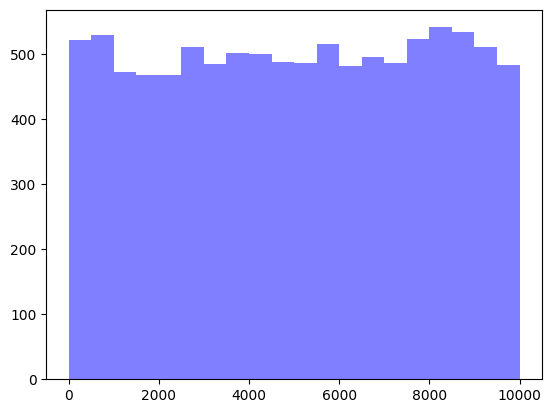

------- статистичны характеристики НОРМАЛЬНОЇ похибки вимірів -----
матиматичне сподівання ВВ= -0.05223603763712931
дисперсія ВВ = 24.91740893114025
СКВ ВВ= 4.991734060538507
------------------------------------------------------------------


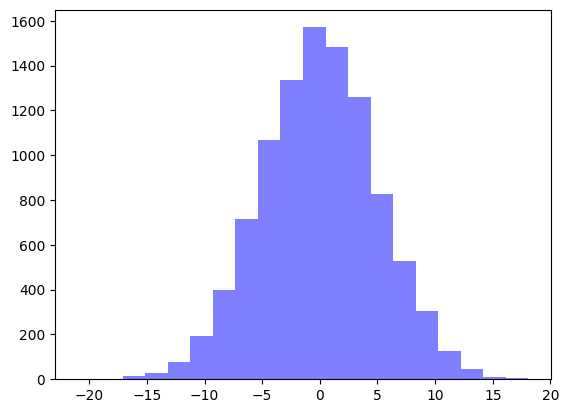

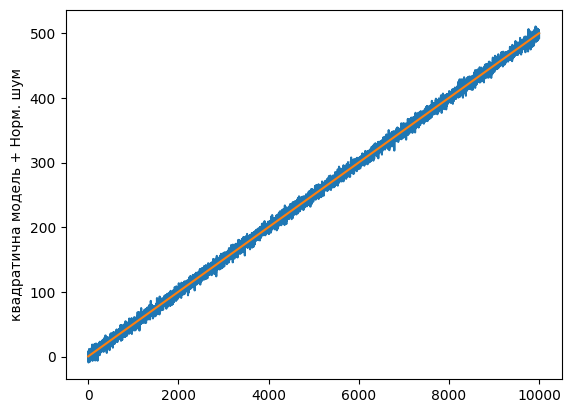

------------ Вибірка + Норм. шум -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.03195871124242444
дисперсія ВВ = 24.912863992661205
СКВ ВВ= 4.991278793321528
-----------------------------------------------------


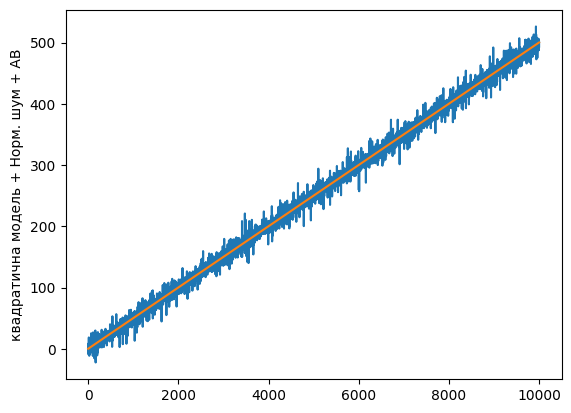

------------ Вибірка з АВ -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.006116389915717946
дисперсія ВВ = 43.61130158790076
СКВ ВВ= 6.603885340305415
-----------------------------------------------------


In [ ]:
# ------------------------------ сегмент констант ---------------------------
n = 10000
iter = int(n)  # кількість реалізацій ВВ
Q_AV = 3  # коефіцієнт переваги АВ
nAVv = 10
nAV = int((iter * nAVv) / 100)  # кількість АВ у відсотках та абсолютних одиницях
dm = 0
dsig = 5  # параметри нормального закону розподілу ВВ: середне та СКВ

# ------------------------------ сегмент даних ---------------------------
# ------------ виклики функцій моделей: тренд, аномального та нормального шуму  ----------
S0 = Model(n)  # модель ідеального тренду (квадратичний закон)
SAV = randomAM(n, iter)  # модель рівномірних номерів АВ
S = randoNORM(dm, dsig, iter)  # модель нормальних помилок
# ----------------------------- Нормальні похибки ------------------------------------
SV = Model_NORM(S, S0, n)  # модель тренда + нормальних помилок
Plot_AV(S0, SV, 'квадратична модель + Норм. шум')
Stat_characteristics_in(SV, 'Вибірка + Норм. шум')
# ----------------------------- Аномальні похибки ------------------------------------
SV_AV = Model_NORM_AV(S0, SV, nAV, Q_AV)  # модель тренда + нормальних помилок + АВ
Plot_AV(S0, SV_AV, 'квадратична модель + Норм. шум + АВ')
Stat_characteristics_in(SV_AV, 'Вибірка з АВ')

### Реальні дані

### Купівля

0      27.70
1      27.75
2      27.78
3      27.75
4      27.85
       ...  
343    40.10
344    39.95
345    39.80
346    39.80
347    39.80
Name: Купівля, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


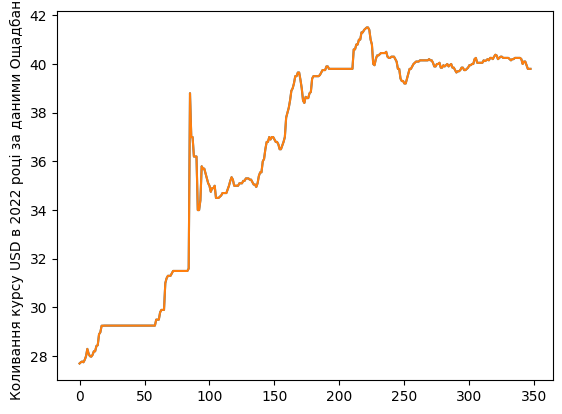

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -0.09548375755082894
дисперсія ВВ = 0.9891767028531209
СКВ ВВ= 0.9945736286736748
-----------------------------------------------------


In [ ]:
SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive', '/content/Oschadbank (USD).xls', 'Купівля')  # реальні дані

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

### Продаж

0      28.10
1      28.12
2      28.12
3      28.10
4      28.20
       ...  
343    40.80
344    40.70
345    40.60
346    40.60
347    40.55
Name: Продаж, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


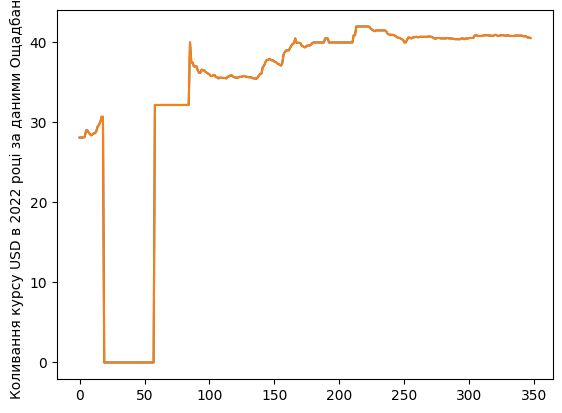

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= 0.2243231691173122
дисперсія ВВ = 63.896746894523595
СКВ ВВ= 7.993544075973035
-----------------------------------------------------


In [ ]:
SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive', '/content/Oschadbank (USD).xls', "Продаж")

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

### КурсНБУ

0      27.9998
1      27.9619
2      27.9795
3      27.8756
4      28.0346
        ...   
343    36.5686
344    36.5686
345    36.5686
346    36.5686
347    36.5686
Name: КурсНбу, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


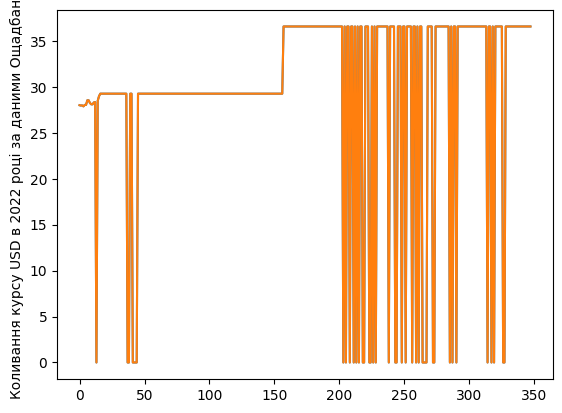

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= 1.9970139022349205
дисперсія ВВ = 123.68764833066759
СКВ ВВ= 11.12149487841754
-----------------------------------------------------


In [ ]:
SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive', '/content/Oschadbank (USD).xls', 'КурсНбу')  # реальні дані

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')


## ------------------- вибір функціоналу статистичного навчання -----------------------

Вибірка очищена від АВ метод medium
------------ Вибірка очищена від алгоритм medium АВ -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка відчищена від АВ алгоритм medium -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------


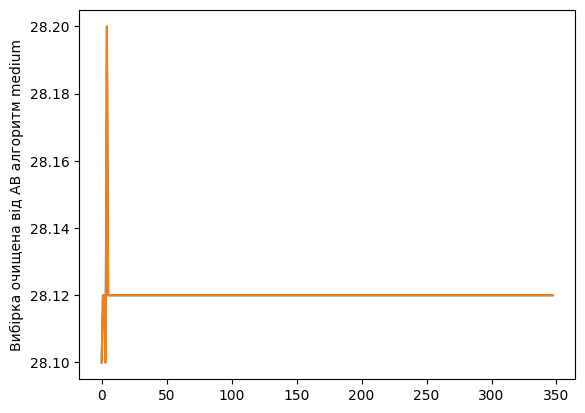

In [ ]:
print('Вибірка очищена від АВ метод medium')
# --------- Увага!!! якість результату залежить від якості еталонного вікна -----------
N_Wind_Av = 5  # розмір ковзного вікна для виявлення АВ
Q = 1.6  # коефіцієнт виявлення АВ
S_AV_Detect_medium = Sliding_Window_AV_Detect_medium(SV_AV, N_Wind_Av, Q)
Stat_characteristics_in(S_AV_Detect_medium, 'Вибірка очищена від алгоритм medium АВ')
Yout_SV_AV_Detect = MNK(S_AV_Detect_medium)
Stat_characteristics_out(SV_AV, Yout_SV_AV_Detect, 'МНК Вибірка відчищена від АВ алгоритм medium')
Plot_AV(S0, S_AV_Detect_medium, 'Вибірка очищена від АВ алгоритм medium')

Вибірка очищена від АВ метод MNK
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ Вибірка очищена від АВ алгоритм MNK -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка очищена від АВ алгоритм MNK -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------


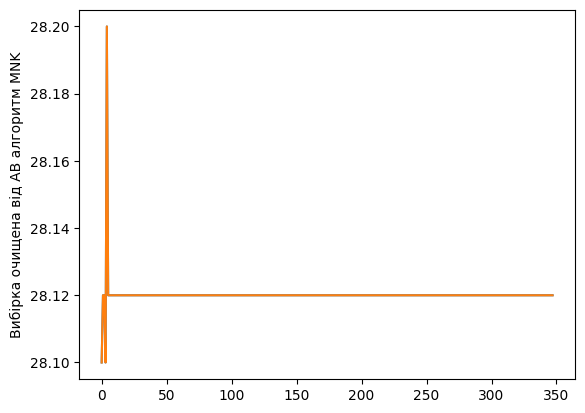

In [ ]:
print('Вибірка очищена від АВ метод MNK')
# ------------------- Очищення від аномальних похибок МНК --------------------------
n_Wind = 5  # розмір ковзного вікна для виявлення АВ
Q_MNK = 7  # коефіцієнт виявлення АВ
S_AV_Detect_MNK = Sliding_Window_AV_Detect_MNK(SV_AV, Q_MNK, n_Wind)
Stat_characteristics_in(S_AV_Detect_MNK, 'Вибірка очищена від АВ алгоритм MNK')
Yout_SV_AV_Detect_MNK = MNK(S_AV_Detect_MNK)
Stat_characteristics_out(SV_AV, Yout_SV_AV_Detect_MNK, 'МНК Вибірка очищена від АВ алгоритм MNK')
Plot_AV(S0, S_AV_Detect_MNK, 'Вибірка очищена від АВ алгоритм MNK')

Вибірка очищена від АВ метод sliding_wind
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------


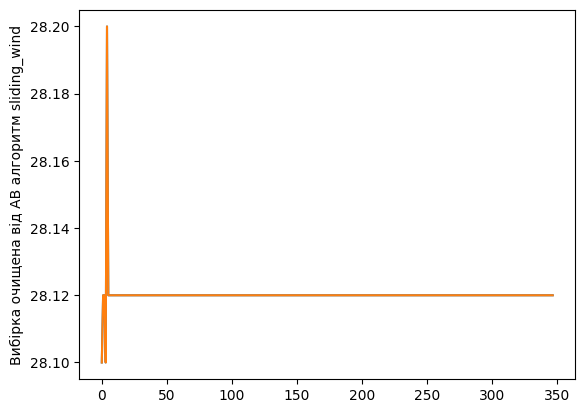

In [ ]:
print('Вибірка очищена від АВ метод sliding_wind')
# --------------- Очищення від аномальних похибок sliding window -------------------
n_Wind = 5  # розмір ковзного вікна для виявлення АВ
S_AV_Detect_sliding_wind = Sliding_Window_AV_Detect_sliding_wind(SV_AV, n_Wind)
Stat_characteristics_in(S_AV_Detect_sliding_wind, 'Вибірка очищена від АВ алгоритм sliding_wind')
Yout_SV_AV_Detect_sliding_wind = MNK(S_AV_Detect_sliding_wind)
Stat_characteristics_out(SV_AV, Yout_SV_AV_Detect_sliding_wind,
                          'МНК Вибірка очищена від АВ алгоритм sliding_wind')
Plot_AV(S0, S_AV_Detect_sliding_wind, 'Вибірка очищена від АВ алгоритм sliding_wind')

Вибірка очищена від АВ метод sliding_wind
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------


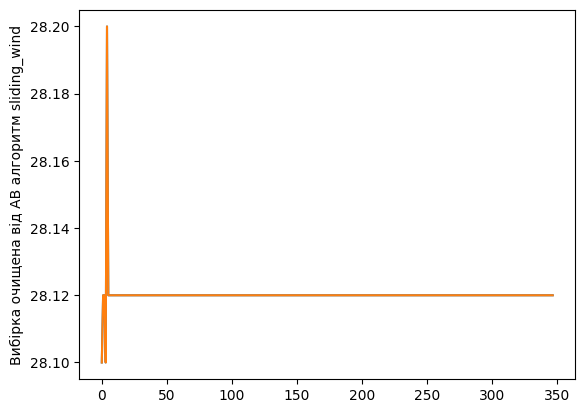

In [ ]:
print('Вибірка очищена від АВ метод sliding_wind')
# --------------- Очищення від аномальних похибок sliding window -------------------
n_Wind = 5  # розмір ковзного вікна для виявлення АВ
S_AV_Detect_sliding_wind = Sliding_Window_AV_Detect_sliding_wind(SV_AV, n_Wind)
Stat_characteristics_in(S_AV_Detect_sliding_wind, 'Вибірка очищена від АВ алгоритм sliding_wind')
Yout_SV_AV_Detect_sliding_wind = MNK(S_AV_Detect_sliding_wind)
Stat_characteristics_out(SV_AV, Yout_SV_AV_Detect_sliding_wind,
                          'МНК Вибірка очищена від АВ алгоритм sliding_wind')
Plot_AV(S0, S_AV_Detect_sliding_wind, 'Вибірка очищена від АВ алгоритм sliding_wind')

MNK згладжена вибірка очищена від АВ алгоритм sliding_wind
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ MNK згладжена, вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------
------------ MNK_модель_згладжування -------------
кількість елементів вбірки= 348
Коефіцієнт детермінації (ймовірність апроксимації)= 0.004245727908412378


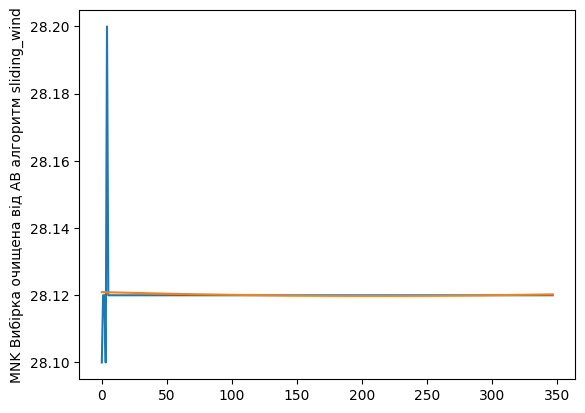

In [ ]:
print('MNK згладжена вибірка очищена від АВ алгоритм sliding_wind')
# --------------- Очищення від аномальних похибок sliding window -------------------
n_Wind = 5  # розмір ковзного вікна для виявлення АВ
S_AV_Detect_sliding_wind = Sliding_Window_AV_Detect_sliding_wind(SV_AV, n_Wind)
Stat_characteristics_in(S_AV_Detect_sliding_wind, 'Вибірка очищена від АВ алгоритм sliding_wind')
Yout_SV_AV_Detect_sliding_wind = MNK(S_AV_Detect_sliding_wind)
Stat_characteristics_out(SV_AV, Yout_SV_AV_Detect_sliding_wind,
                          'MNK згладжена, вибірка очищена від АВ алгоритм sliding_wind')
# --------------- Оцінювання якості моделі та візуалізація -------------------------
r2_score(S_AV_Detect_sliding_wind, Yout_SV_AV_Detect_sliding_wind, 'MNK_модель_згладжування')
Plot_AV(Yout_SV_AV_Detect_sliding_wind, S_AV_Detect_sliding_wind,
        'MNK Вибірка очищена від АВ алгоритм sliding_wind')

MNK ПРОГНОЗУВАННЯ
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ MNK ПРОГНОЗУВАННЯ, вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 522
матиматичне сподівання ВВ= -2.0605739337042905e-13
дисперсія ВВ = 3.825285181903461e-27
СКВ ВВ= 6.184888990033258e-14
Довірчий інтервал прогнозованих значень за СКВ= 1.0761706842657869e-11
-----------------------------------------------------


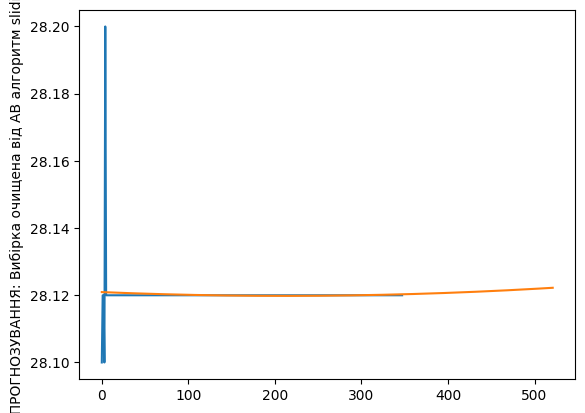

In [ ]:
print('MNK ПРОГНОЗУВАННЯ')
# --------------- Очищення від аномальних похибок sliding window -------------------
n_Wind = 5  # розмір ковзного вікна для виявлення АВ
koef_Extrapol = 0.5  # коефіціент прогнозування: співвідношення інтервалу спостереження до  інтервалу прогнозування
koef = mt.ceil(n * koef_Extrapol)  # інтервал прогнозу по кількісті вимірів статистичної вибірки
S_AV_Detect_sliding_wind = Sliding_Window_AV_Detect_sliding_wind(SV_AV, n_Wind)
Stat_characteristics_in(S_AV_Detect_sliding_wind, 'Вибірка очищена від АВ алгоритм sliding_wind')
Yout_SV_AV_Detect_sliding_wind = MNK_Extrapol(S_AV_Detect_sliding_wind, koef)
Stat_characteristics_extrapol(koef, Yout_SV_AV_Detect_sliding_wind,
                              'MNK ПРОГНОЗУВАННЯ, вибірка очищена від АВ алгоритм sliding_wind')
Plot_AV(Yout_SV_AV_Detect_sliding_wind, S_AV_Detect_sliding_wind,
        'MNK ПРОГНОЗУВАННЯ: Вибірка очищена від АВ алгоритм sliding_wind')

# Аналіз отриманих результатів - верифікація математичних моделей та результатів розрахунків.
------------------------------------------------------------------------------------------

1. Задані характеристики вхідної вибірка:
часова надмірність даних із ЛІНІЙНИМ законом;
статистичні характеристики:
    закон розподілу ВВ - РІВНОМІРНИЙ
    n = 10000   # кількість реалізацій ВВ - об'єм вибірки
    dm = 0
    dsig = 5    # параметри рівномірного закону розподілу ВВ: середнє та СКВ

2. Визначені характеристики вхідної вибірки:
    часова надмірність даних із ЛІНІЙНИМ законом підтверджена графіком;

    статистичні характеристики:
    закон розподілу ВВ - РІВНОМІРНИЙ, підтверджено гістограмою;

----- статистичны характеристики РІВНОМІРНОГО закону розподілу ВВ -----
матиматичне сподівання ВВ= 5058.0
дисперсія ВВ = 8401277.297625588
СКВ ВВ= 2898.4956956368915
-----------------------------------------------------------------------

------- статистичны характеристики НОРМАЛЬНОЇ похибки вимірів -----
матиматичне сподівання ВВ= -0.05223603763712931
дисперсія ВВ = 24.91740893114025
СКВ ВВ= 4.991734060538507
------------------------------------------------------------------


------------ Вибірка + Норм. шум -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.03195871124242444
дисперсія ВВ = 24.912863992661205
СКВ ВВ= 4.991278793321528
-----------------------------------------------------

------------ Вибірка з АВ -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.006116389915717946
дисперсія ВВ = 43.61130158790076
СКВ ВВ= 6.603885340305415
-----------------------------------------------------

------------------- вибір функціоналу статистичного навчання -----------------------

Вибірка очищена від АВ метод medium
------------ Вибірка очищена від алгоритм medium АВ -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка відчищена від АВ алгоритм medium -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------
<br><br>

Вибірка очищена від АВ метод MNK
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ Вибірка очищена від АВ алгоритм MNK -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка очищена від АВ алгоритм MNK -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------

<br><br>
Вибірка очищена від АВ метод sliding_wind
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------

<br><br>
Вибірка очищена від АВ метод sliding_wind
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ МНК Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
----------------------------------------------------

<br><br>
MNK згладжена вибірка очищена від АВ алгоритм sliding_wind
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ MNK згладжена, вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 348
матиматичне сподівання ВВ= -2.1316282072803006e-13
дисперсія ВВ = 3.625239420161552e-27
СКВ ВВ= 6.020996113735294e-14
Динамічна похибка моделі= 0.0005642613041647338
-----------------------------------------------------
------------ MNK_модель_згладжування -------------
кількість елементів вбірки= 348
Коефіцієнт детермінації (ймовірність апроксимації)= 0.004245727908412378

<br><br>
MNK ПРОГНОЗУВАННЯ
------------ Вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -1.3421666267277033e-05
дисперсія ВВ = 2.0588656834764015e-05
СКВ ВВ= 0.0045374725161442045
-----------------------------------------------------
Регресійна модель:
y(t) =  28.120946942001872  +  -1.06071303918754e-05  * t  +  2.5086666391081568e-08  * t^2
------------ MNK ПРОГНОЗУВАННЯ, вибірка очищена від АВ алгоритм sliding_wind -------------
кількість елементів ивбірки= 522
матиматичне сподівання ВВ= -2.0605739337042905e-13
дисперсія ВВ = 3.825285181903461e-27
СКВ ВВ= 6.184888990033258e-14
Довірчий інтервал прогнозованих значень за СКВ= 1.0761706842657869e-11
-----------------------------------------------------

# Висновок
------------------------------------------------------------------------------------------

Вибір методу зглажування та його параметрів суттєво впливає на якість зглажування